# Lista de Exercício 06
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 2 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Thallys Oliveira`

`Número USP: 11819827`

### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [51]:
import numpy as np
import matplotlib.pyplot as plt

#bibliotecas para Cluster Analysis
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [52]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_06/flores.csv", "flores.csv")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Análise de Agrupamentos (*Cluster Analysis*)

Uma forma de agrupar dados que não possuem classes preestabelecidas é utilizando um método não-supervisionado, como o algoritmo de análise hierárquica e seu dendrograma equivalente. Outro método é o K-Means, que por meio de um método iterativo encontra K grupos de acordo com uma métrica de similaridade, como a distância euclidiana.

Abaixo temos um conjunto de dados sobre algumas flores. Neste exercício realizaremos o agrupamento dessas flores utilizando atributos apresentados (Comprimento da sépala, Largura da sépala, Comprimento da pétala).

<center><figcaption><b> Tabela 1: </b> Relação de algumas flores</b></figcaption>
</figure>

>Flor | Comprimento da sépala (mm) | Largura da sépala (mm) | Comprimento da pétala (mm)
>--- | --- | --- | ---
><center>Flor 1 | <center>41 | <center>40 | <center>14
><center>Flor 2 | <center>57 | <center>3 | <center>32
><center>Flor 3 | <center>51 | <center>5 | <center>36
><center>Flor 4 | <center>68 | <center>28 | <center>54
><center>Flor 5 | <center>46 | <center>38 | <center>14
><center>Flor 6 | <center>44 | <center>39 | <center>17
><center>Flor 7  | <center>64 | <center>24 | <center>52
><center>Flor 8  | <center>61 | <center>3 | <center>36
><center>Flor 9  | <center>55 | <center>4 | <center>34
><center>Flor 10  | <center>46 | <center>41 | <center>15
><center>Flor 11  | <center>56 | <center>3 | <center>31
><center>Flor 12  | <center>69 | <center>26 | <center>51
><center>Flor 13  | <center>66 | <center>25 | <center>55
><center>Flor 14  | <center>45 | <center>37 | <center>14
><center>Flor 15  | <center>69 | <center>26 | <center>51
</center>

**Exercício:**

**1**. Carregar a tabela de dados disponível no arquivo **flores.csv**. Os dados seguem a mesma ordem apresentada na **Tabela 1**.

**2**. Fazer a padronização dos dados pela amostra de acordo com a fórmula abaixo:

\begin{equation}
  Z = \frac{X - \bar{X}}{\sigma_{X}}
\end{equation}

onde $X$ representa o atributo analisado, $\bar{X}$ o seu valor médio e $\sigma_{X}$ o sue desvio padrão.

**3**. Encontrar a Matriz de Distância dos dados padronizados em (**2**) utilizando a função [**pdist**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist), que retorna a Matriz de Distância condensada (apenas os valores acima da diagonal principal), ideal para a utilização com as demais funções da biblioteca **scipy** para tal finalidade.

* `D = pdist(M) %‘M’ é a matriz padronizada`

**4**. Definir as Ligações para agrupar os objetos/Vetores utilizando a Ligação Centróide. [**hierarchy.linkage**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

* `Z = hierarchy.linkage(D,'centroid')`

**5**. Plotar o Dendrograma de Z e expliquar o significado de cada ramo. [**hierarchy.dendrogram**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

* `H = hierarchy.dendrogram(Z,labels=nomes,orientation='right')`

OBS: O eixo de similaridade para o caso da função do SciPy é apresentado com valores de nível de distância em lugar de similaridade.

**6**. Qual o limiar que se deve estabelecer para separar as flores em 3 grupos?

**7**. Aplicar o método K-means (para k=3) para tentar agrupar os vetores de atributos. Imprimir os valores dos centróides e os agrupamentos após o método convergir.

* É possível utilizar as funções (métodos) da classe [**KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) da biblioteca **sklearn**:

  `kmeans = KMeans(n_clusters=numero_de_clusters, random_state=0).fit(dados_padronizados)`
  
  `classe_de_cada_amostra = kmeans.labels_`

  `centroides = kmeans.cluster_centers_`

**8**. Utilizando a função [**scatter3D**](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) do matplotlib, plote o espaço tridimensional com os atributos (Comprimento da sépala, Largura da sépala, Comprimento da pétala) de cada flor, além de indicar os 3 centroides calculados.

**9**. Com os centroides encontrados em (**3**), verifique em qual Grupo (Cluster) a nova flor (Flor Teste) é classificada, verificando com qual tem maior similaridade (utilize a distância Euclidiana para verificação da classe) e não se esqueça de aplicar a padronização baseada no conjunto de treino.

<center>

>Flor | Comprimento da sépala (mm) | Largura da sépala (mm) | Comprimento da pétala (mm)
>--- | --- | --- | ---
><center>Flor Teste | <center>56 | <center>11 | <center>31
</center>

* É possível utilziar um método do **KMeans** para realizar a classificação do novo vetor de característica:

  `nova_predição = kmeans.predict(vetor_flor_teste)`


<font size="3" color="darkblue"><b>Dicas:</b></font>


*  Você pode utilizar a função [np.genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt) para carregar o arquivo .csv. Em geral, para esse tipo de arquivo é utilizada a biblioteca Pandas.

*Ex:*
``` python
    dados_flores = np.genfromtxt('flores.csv',dtype=int,delimiter=';')
```

* Você pode utilizar a função [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) da biblioteca `numpy.linalg` para calcular a distância entre os vetores.

*Ex:*
``` python
    distancia = np.linalg.norm(diferenca_entre_vetores)
```

* O dendrograma pela função da biblioteca scipy é plotado em níveis de distância, em lugar de indicar a similaridade como apresentado em aula. Entretanto, a análise é análoga. O seu tamanho pode ser definido como uma plt.figure:

*Ex:*
``` python
    plt.figure(figsize=(largura,altura))
    dn = hierarchy.dendrogram(Z,labels=labels,orientation='right')
    plt.show()
```   
* Para o gráfico 3D, pode-se plotá-lo utilizando funções do matplotlib, como pelo seguinte exemplo:

``` python
    fig = plt.figure(figsize = (largura, altura))
    ax = plt.axes(projection ="3d")
    # Criando o  plot
    # As coordenadas x, y e z podem ser vetores com várias coordenadas em uma quantidade igual de valores. O parâmetro c ou color, pode ser um vetor de cores ou apenas uma cor.
    ax.scatter3D(x, y, z, c=vetor_de_cores,s=tamanho_do_ponto)
    # O ax.text permite adicionar uma etiqueta ao ponto que se deseja. Se preferir etiquetar todos os pontos é possível chamar a função em um laço for
    ax.text(x, y, z,  'etiqueta', size=10, zorder=1, color='k')
    ax.set_xlabel('Atributo 1')
    ax.set_ylabel('Atributo 2')
    ax.set_zlabel('Atributo 3')
    plt.title("Títlo do Gráfico")
    plt.show()
```  


**1**. Carregar a tabela de dados disponível no arquivo **flores.csv**. Os dados seguem a mesma ordem apresentada na **Tabela 1**.

In [53]:
# Criação da lista com os indices dos arquivo flores.csv
nomes_flores=['Flor 1', 'Flor 2', 'Flor 3', 'Flor 4', 'Flor 5', 'Flor 6', 'Flor 7', 'Flor 8', 'Flor 9', 'Flor 10', 'Flor 11', 'Flor 12', 'Flor 13', 'Flor 14', 'Flor 15',]

# Importando os dados da arquivo flores.csv
dados_flores = np.genfromtxt('flores.csv',dtype=int,delimiter=';')

for i in range(0, len(nomes_flores)):
    print('{}: {} {} {}'.format(nomes_flores[i], dados_flores[i][0], dados_flores[i][1], dados_flores[i][2]))

Flor 1: 41 40 14
Flor 2: 57 3 32
Flor 3: 51 5 36
Flor 4: 68 28 54
Flor 5: 46 38 14
Flor 6: 44 39 17
Flor 7: 64 24 52
Flor 8: 61 3 36
Flor 9: 55 4 34
Flor 10: 46 41 15
Flor 11: 56 3 31
Flor 12: 69 29 56
Flor 13: 66 25 55
Flor 14: 45 37 14
Flor 15: 69 26 51


**2**. Fazer a padronização dos dados pela amostra de acordo com a fórmula abaixo:

\begin{equation}
  Z = \frac{X - \bar{X}}{\sigma_{X}}
\end{equation}

In [54]:

# Padronização dos dados
dados_padronizados = (dados_flores - np.mean(dados_flores, axis = 0))/(np.std(dados_flores,axis=0))
print("Dados padronizados: ")
print(dados_padronizados, "\n")

Dados padronizados: 
[[-1.54563244  1.15492257 -1.25927094]
 [ 0.11782848 -1.35873244 -0.12969236]
 [-0.50596936 -1.2228592   0.12132511]
 [ 1.26145786  0.33968311  1.25090369]
 [-1.0258009   1.01904933 -1.25927094]
 [-1.23373351  1.08698595 -1.07100784]
 [ 0.84559263  0.06793662  1.12539496]
 [ 0.53369371 -1.35873244  0.12132511]
 [-0.09010413 -1.29079582 -0.00418362]
 [-1.0258009   1.2228592  -1.19651657]
 [ 0.01386217 -1.35873244 -0.19244672]
 [ 1.36542417  0.40761973  1.37641242]
 [ 1.05352525  0.13587324  1.31365805]
 [-1.12976721  0.95111271 -1.25927094]
 [ 1.36542417  0.20380987  1.06264059]] 



**3**. Encontrar a Matriz de Distância dos dados padronizados em (**2**) utilizando a função [**pdist**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist), que retorna a Matriz de Distância condensada (apenas os valores acima da diagonal principal), ideal para a utilização com as demais funções da biblioteca **scipy** para tal finalidade.

* `D = pdist(M) %‘M’ é a matriz padronizada`

In [55]:
D = pdist(dados_padronizados)
print("Matriz de distância dos dados padronizados: ")
print(D, "\n")

Matriz de distância dos dados padronizados: 
[3.21893019 2.93952222 3.85296613 0.53729542 0.37059319 3.54769323
 3.54233034 3.1105217  0.52799462 3.14461427 3.99744154 3.79658344
 0.46312239 3.84319387 0.68599931 2.46952404 2.87013625 2.94861546
 2.0347652  0.48575061 0.25219794 3.01837994 0.12143765 2.63530769
 2.27873539 2.85794111 2.32802305 2.61558507 2.68373324 2.6993857
 2.12156309 1.0485041  0.43967228 2.82638815 0.62220505 2.78133412
 2.38743275 2.64977792 2.53447691 3.46324526 3.48937168 0.512389
 2.16568784 2.46179315 3.46430636 2.55428479 0.17656959 0.29784651
 3.52033807 0.25438853 0.28860761 3.17700497 3.16099906 2.79036865
 0.21325237 2.80586161 3.61090435 3.42396858 0.12419492 3.43130382
 3.19158958 3.24453314 2.84602323 0.27829832 2.88269025 3.63414709
 3.4384298  0.25438853 3.47679109 1.77223639 1.99940743 3.19800454
 2.11278652 0.66979042 0.28860761 3.22004316 0.54094776 0.63991529
 3.29140479 0.60718826 2.32099542 1.98134521 3.16362644 2.00484136
 2.93524238 0.225537

**4**. Definir as Ligações para agrupar os objetos/Vetores utilizando a Ligação Centróide. [**hierarchy.linkage**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

* `Z = hierarchy.linkage(D,'centroid')`

In [56]:
#Ligação centroide para agrupar objetos
Z = hierarchy.linkage(D,'centroid')
print("Ligações para agrupamentos: ")
print(Z, "\n")

Ligações para agrupamentos: 
[[ 1.         10.          0.12143765  2.        ]
 [ 4.         13.          0.12419492  2.        ]
 [ 3.         11.          0.17656959  2.        ]
 [ 8.         15.          0.23140616  3.        ]
 [ 9.         16.          0.25135397  3.        ]
 [ 5.         19.          0.24195483  4.        ]
 [ 6.         12.          0.28860761  2.        ]
 [14.         17.          0.30750312  3.        ]
 [21.         22.          0.43784969  5.        ]
 [ 0.         20.          0.45429846  5.        ]
 [ 7.         18.          0.56893177  4.        ]
 [ 2.         25.          0.68274656  5.        ]
 [23.         26.          2.30196404 10.        ]
 [24.         27.          3.02412686 15.        ]] 



**5**. Plotar o Dendrograma de Z e expliquar o significado de cada ramo. [**hierarchy.dendrogram**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

* `H = hierarchy.dendrogram(Z,labels=nomes,orientation='right')`

Hierarquias: 
{'icoord': [[35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [15.0, 15.0, 32.5, 32.5], [5.0, 5.0, 23.75, 23.75], [55.0, 55.0, 65.0, 65.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [60.0, 60.0, 82.5, 82.5], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [115.0, 115.0, 132.5, 132.5], [105.0, 105.0, 123.75, 123.75], [71.25, 71.25, 114.375, 114.375], [14.375, 14.375, 92.8125, 92.8125]], 'dcoord': [[0.0, 0.1241949181634621, 0.1241949181634621, 0.0], [0.0, 0.25135397394140346, 0.25135397394140346, 0.1241949181634621], [0.0, 0.24195483456553843, 0.24195483456553843, 0.25135397394140346], [0.0, 0.4542984552215554, 0.4542984552215554, 0.24195483456553843], [0.0, 0.2886076066363814, 0.2886076066363814, 0.0], [0.0, 0.17656958777230433, 0.17656958777230433, 0.0], [0.0, 0.30750311970860483, 0.30750311970860483, 0.17656958777230433], [0.2886076066363814, 0.4378496890856769, 0.4378496890856769, 0.30750311970860483], [0.0, 0.1214376526838259, 0.1214376526838259

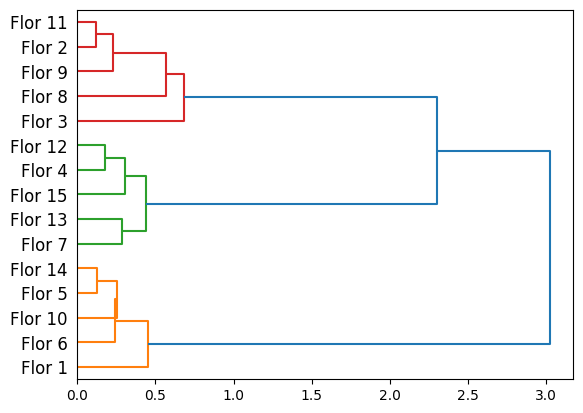

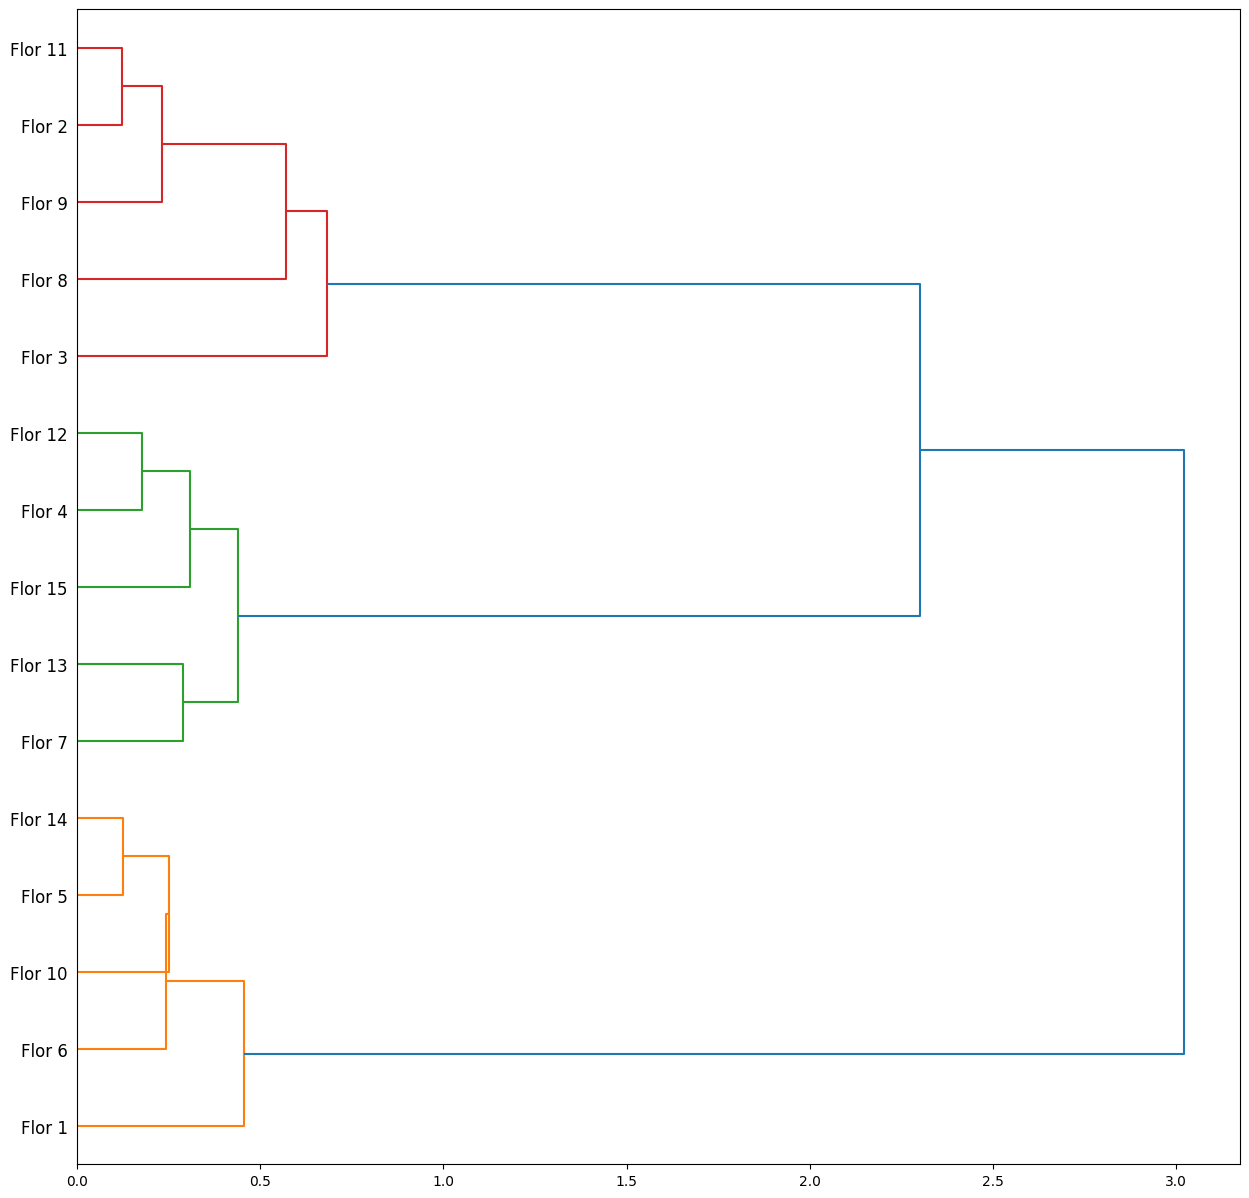

In [86]:
H = hierarchy.dendrogram(Z,labels=nomes_flores,orientation='right')
print("Hierarquias: ")
print(H)

largura, altura = 15,15
plt.figure(figsize=(largura,altura))
dn = hierarchy.dendrogram(Z,labels=nomes_flores,orientation='right')
plt.show()


**6**. Qual o limiar que se deve estabelecer para separar as flores em 3 grupos?

Analisando o dendograma acima, utilizamos um limiar de 0.8 para separar os três grupos. 

**7**. Aplicar o método K-means (para k=3) para tentar agrupar os vetores de atributos. Imprimir os valores dos centróides e os agrupamentos após o método convergir.

* É possível utilizar as funções (métodos) da classe [**KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) da biblioteca **sklearn**:

  `kmeans = KMeans(n_clusters=numero_de_clusters, random_state=0).fit(dados_padronizados)`
  
  `classe_de_cada_amostra = kmeans.labels_`

  `centroides = kmeans.cluster_centers_`

In [91]:
# Aplicando o Método K-Means para um k = 3
numero_de_clusters = 3
kmeans = KMeans(n_clusters=numero_de_clusters, random_state=0).fit(dados_padronizados)
classe_de_cada_amostra, centroides = kmeans.labels_,kmeans.cluster_centers_

print("Agrupamento K-Means: Grupo de cada flor")
for i in range(0, len(nomes_flores)):
    print('{}: Grupo {}'.format(nomes_flores[i], classe_de_cada_amostra[i]))

print('\n')
print("Centróides dos Grupos - Coordenadas X, Y e Z: ")
for i in range(0, len(centroides)):
    print('Grupo {}: {}, {} e {}'.format(nomes_flores[i], centroides[i][0],centroides[i][1],centroides[i][2]))



Agrupamento K-Means: Grupo de cada flor
Flor 1: Grupo 1
Flor 2: Grupo 0
Flor 3: Grupo 0
Flor 4: Grupo 2
Flor 5: Grupo 1
Flor 6: Grupo 1
Flor 7: Grupo 2
Flor 8: Grupo 0
Flor 9: Grupo 0
Flor 10: Grupo 1
Flor 11: Grupo 0
Flor 12: Grupo 2
Flor 13: Grupo 2
Flor 14: Grupo 1
Flor 15: Grupo 2


Centróides dos Grupos - Coordenadas X, Y e Z: 
Grupo Flor 1: 0.013862174325035649, -1.3179704677443096 e -0.016734497504497996
Grupo Flor 2: -1.1921469919530698, 1.086985952778812 e -1.2090674446999659
Grupo Flor 3: 1.1782848176280338, 0.23098451496549757 e 1.2258019422044633


/home/thallys/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**8**. Utilizando a função [**scatter3D**](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) do matplotlib, plote o espaço tridimensional com os atributos (Comprimento da sépala, Largura da sépala, Comprimento da pétala) de cada flor, além de indicar os 3 centroides calculados.

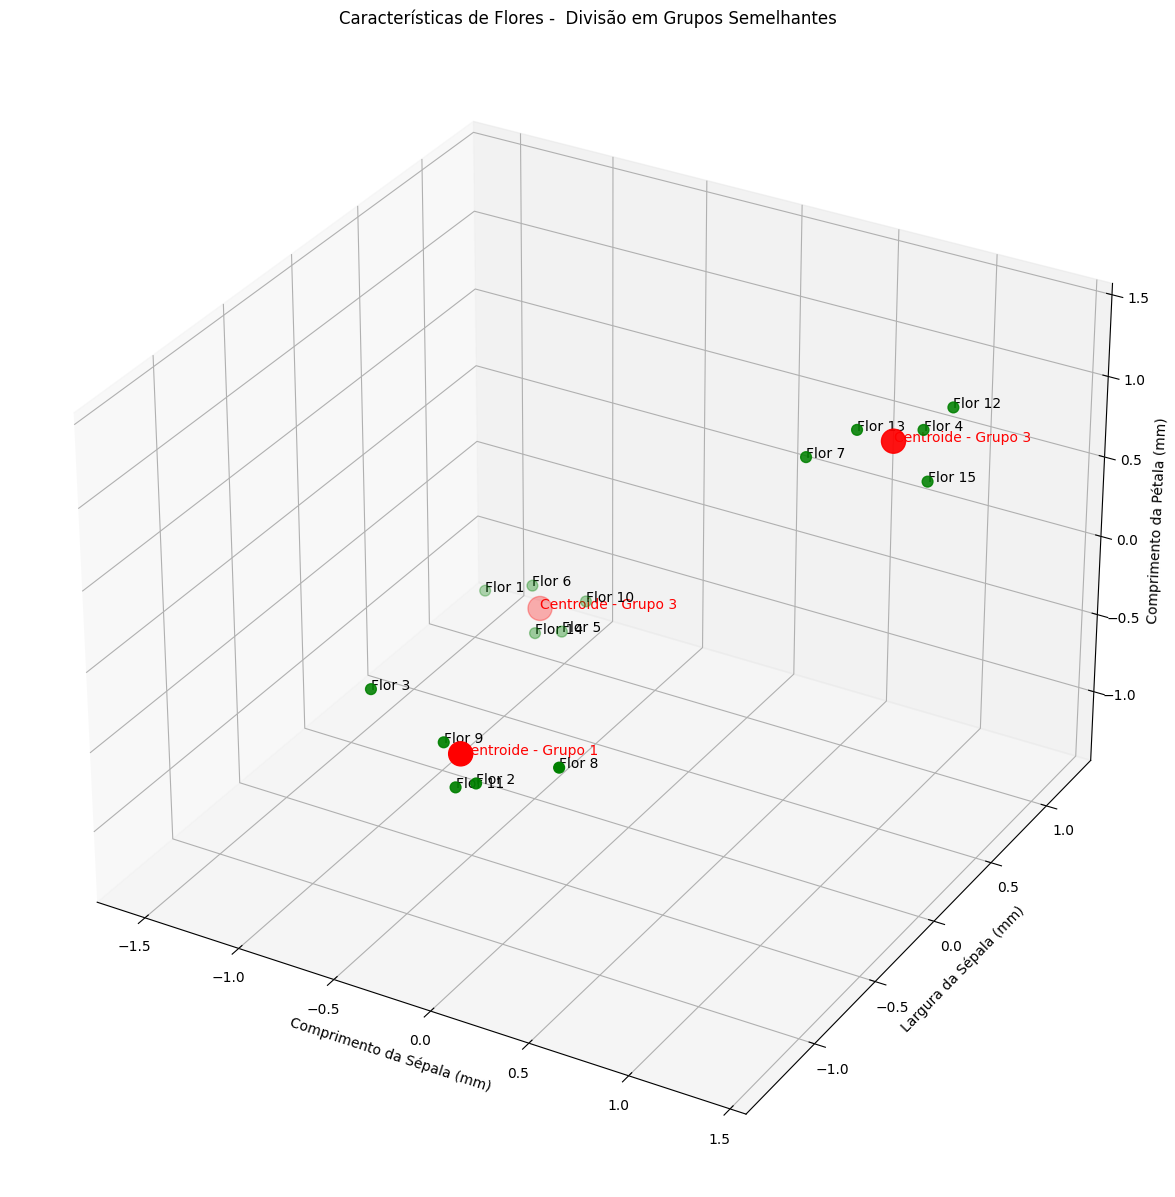

In [93]:
largura, altura, tamanho_do_ponto = 15,15,60
vetor_de_cores = 'green'

grupos = ['Centroide - Grupo 1', 'Centroide - Grupo 3','Centroide - Grupo 3']


fig = plt.figure(figsize = (largura, altura))
ax = plt.axes(projection ="3d")

ax.scatter3D(dados_padronizados[:,0], dados_padronizados[:,1], dados_padronizados[:,2], c = vetor_de_cores,s=tamanho_do_ponto)
ax.scatter3D(centroides[:,0], centroides[:,1], centroides[:,2],c = 'red',s = 300)

for i in range(0, len(grupos)):
    ax.text(centroides[i,0], centroides[i,1], centroides[i,2], grupos[i], size=10, zorder=1, color='red')

for i in range(0, len(nomes_flores)):
    ax.text(dados_padronizados[i,0], dados_padronizados[i,1], dados_padronizados[i,2],  nomes_flores[i], size=10, zorder=1, color='k')

ax.set_xlabel('Comprimento da Sépala (mm)')
ax.set_ylabel('Largura da Sépala (mm)')
ax.set_zlabel('Comprimento da Pétala (mm)')
plt.title("Características de Flores -  Divisão em Grupos Semelhantes")
plt.show()

**9**. Com os centroides encontrados em (**3**), verifique em qual Grupo (Cluster) a nova flor (Flor Teste) é classificada, verificando com qual tem maior similaridade (utilize a distância Euclidiana para verificação da classe) e não se esqueça de aplicar a padronização baseada no conjunto de treino.


Características da Flor Teste: 56 11 31
Padronização da Flor Teste: 0.013862174325035642 -0.815239464584109 -0.1924467213017248
Distancias - Grupo 1: 0.5325535157429987, Grupo 2: 2.471120665376564 e Grupo 3: 2.1123195731608524
Flor Teste - Classificação: Grupo [1] 


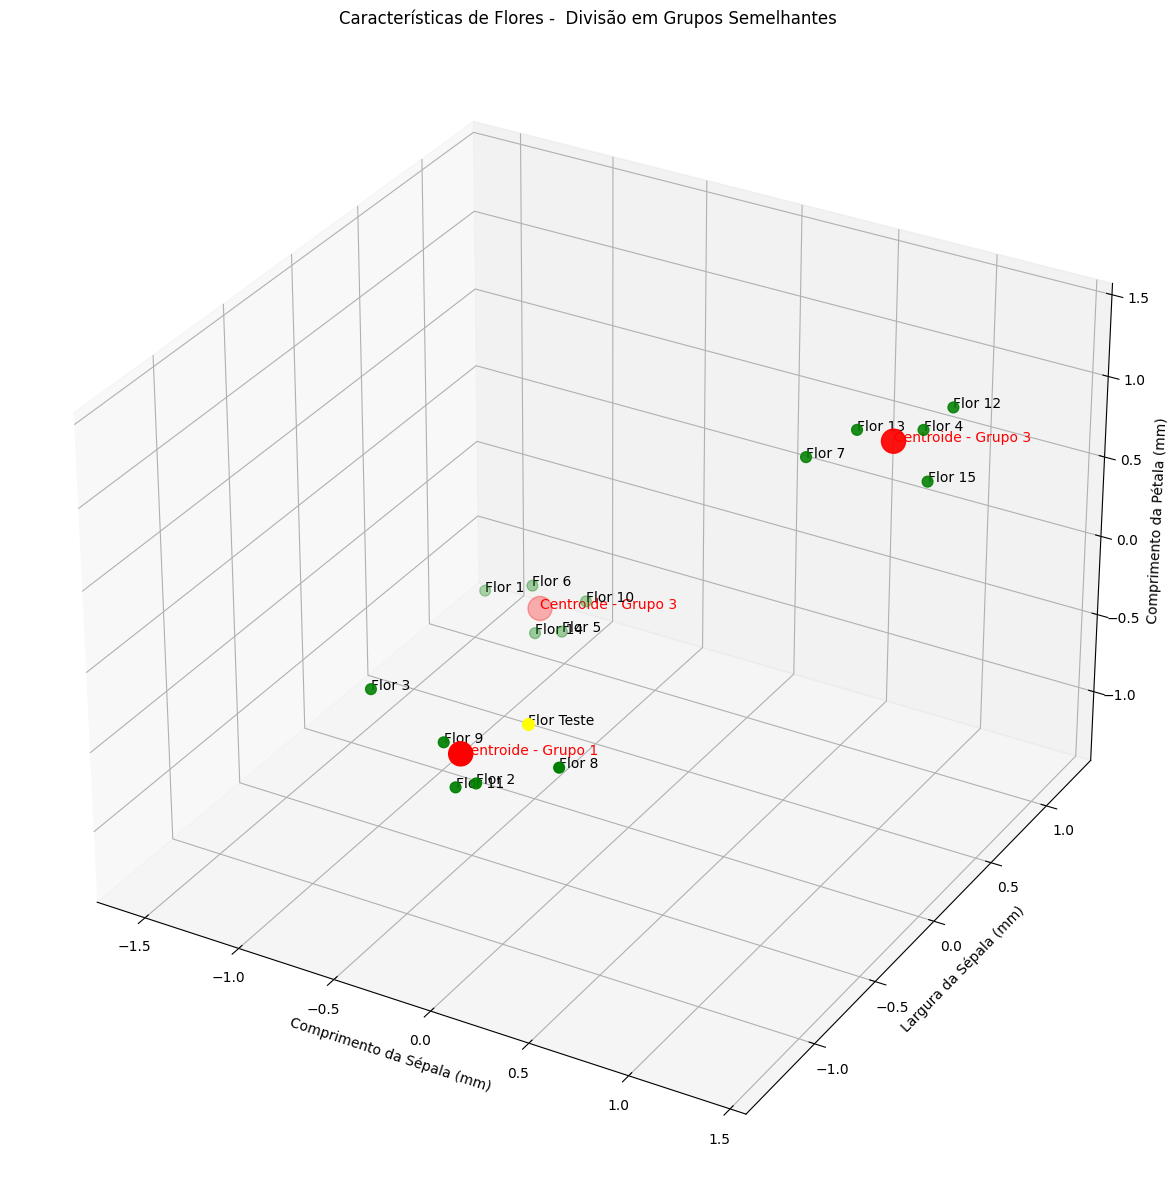

In [100]:
# Criando a Flor Teste
flor_teste = [[56,11,31]]
print('Características da Flor Teste: {} {} {}'.format(flor_teste[0][0],flor_teste[0][1],flor_teste[0][2]))

# Padronização
flor_teste_padronizada = (flor_teste-np.mean(dados_flores, axis = 0))/(np.std(dados_flores,axis=0))
print('Padronização da Flor Teste: {} {} {}'.format(flor_teste_padronizada[0][0],flor_teste_padronizada[0][1],flor_teste_padronizada[0][2]))

# Calculo da distância euclidiana até os centróides
distancia = []
for i in range(0,3):
    distancia.append(np.linalg.norm(centroides[i,:]-flor_teste_padronizada))

print('Distancias - Grupo 1: {}, Grupo 2: {} e Grupo 3: {}'.format(distancia[0],distancia[1], distancia[2]))

#Aplicação do k-means para a classificação
classicacao = kmeans.predict(flor_teste_padronizada)

print("Flor Teste - Classificação: Grupo {} ".format(classicacao+1))

largura, altura, tamanho_do_ponto = 15,15,60
vetor_de_cores = 'green'

grupos = ['Centroide - Grupo 1', 'Centroide - Grupo 3','Centroide - Grupo 3']
fig = plt.figure(figsize = (largura, altura))

ax = plt.axes(projection ="3d")
ax.scatter3D(dados_padronizados[:,0], dados_padronizados[:,1], dados_padronizados[:,2], c = vetor_de_cores,s=tamanho_do_ponto)
ax.scatter3D(centroides[:,0], centroides[:,1], centroides[:,2],c = 'red',s = 300)


ax.scatter3D(flor_teste_padronizada[:,0], flor_teste_padronizada[:,1], flor_teste_padronizada[:,2],c = 'yellow',s = 70)
ax.text(flor_teste_padronizada[0,0], flor_teste_padronizada[0,1], flor_teste_padronizada[0,2], 'Flor Teste',size=10, zorder=1, color='k')

for i in range(0, len(grupos)):
    ax.text(centroides[i,0], centroides[i,1], centroides[i,2], grupos[i], size=10, zorder=1, color='red')

for i in range(0, len(nomes_flores)):
    ax.text(dados_padronizados[i,0], dados_padronizados[i,1], dados_padronizados[i,2],  nomes_flores[i], size=10, zorder=1, color='k')

ax.set_xlabel('Comprimento da Sépala (mm)')
ax.set_ylabel('Largura da Sépala (mm)')
ax.set_zlabel('Comprimento da Pétala (mm)')
plt.title("Características de Flores -  Divisão em Grupos Semelhantes")
plt.show()

#### Comentários: 

Primeiramente, a partir do dendograma, percebemos que o um limiar próximo de 0.8 já é o suficiente para distingir as flores nos três grupos construidos. Posteriormente, além de criamos uma flor de teste, a classificamos de acordo com seu grau de similariedade com os grupos utilizados, a qual foi classificada via distancia euclidiana entre o centroide dos grupos e a sua posição, ocasioando que ela foi classificada no Grupo 1. Por fim plotamos um gráfico 3D sem a flor teste e outro com a flor teste, justamente para ilustrar qual é a situação que era analisada neste trabalho. Ademais, resssaltamos que adotamos a nomeclatura dos 3 grupos como Grupo 1, Grupo 2 e Grupo 3. 